# Superstore Dataset: Exploratory Data Analysis (EDA)

### Case Study:  

**Scenario**: I am a junior data analyst at one of the largest retailers in the United States. The director would like me to deliver insights on how the company can impove profits while minimizing losses. The director would appreciate any other insights that would help answer that who, what, when and how questions regarding the companies performance over the four-year period between 2014-2018.

**Data**: I have been provided data containing information about the customers, orders, shipping, geographical information, sales, profit, products and various other related fields.

**Tools**: To prepare, process, analyze, visualize and identify trends in the data I have decided to use Python and its libraries.

### The Analysis:

In [546]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [556]:
 df = pd.read_csv('superstore_data.csv', encoding="latin1")

In [557]:
df.shape

(9994, 21)

In [558]:
# Check for null or missing data
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [559]:
#Check data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [560]:
#Cast to datetime dtype
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')
#Check dtype
df[['Order Date', 'Ship Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Ship Date   9994 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 156.3 KB


In [561]:
# looking at value consistency for categorical date
print('Ship Mode:', df['Ship Mode'].unique(), "\n")
print('Country:', df['Country'].unique(), "\n")
print('Segment:', df['Segment'].unique(), "\n")
print('Category:', df['Category'].unique(), "\n")
print('Sub-Category:', df['Sub-Category'].unique(), "\n")
print('State:', df['State'].unique(), "\n")
print('Region:', df['Region'].unique(), "\n")

Ship Mode: ['Second Class' 'Standard Class' 'First Class' 'Same Day'] 

Country: ['United States'] 

Segment: ['Consumer' 'Corporate' 'Home Office'] 

Category: ['Furniture' 'Office Supplies' 'Technology'] 

Sub-Category: ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers'] 

State: ['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']

In [562]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [563]:
# Data extraction - Creating new attributes:
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100
df['Order Year'] = df['Order Date'].apply(lambda row: row.year)
df['Order Month'] = df['Order Date'].apply(lambda row: row.month)
df['Order Day'] = df['Order Date'].apply(lambda row: row.day)

In [564]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin,Order Year,Order Month,Order Day
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,16.0,2016,11,8
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,30.0,2016,11,8
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,47.0,2016,6,12


In [565]:
#Summary of numerical data 
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Profit Margin,Order Year,Order Month,Order Day
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,12.031393,2015.722233,7.809686,15.468481
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,46.675435,1.123555,3.284654,8.748327
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,-275.000000,2014.000000,1.000000,1.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,7.500000,2015.000000,5.000000,8.000000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,27.000000,2016.000000,9.000000,15.000000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,36.250000,2017.000000,11.000000,23.000000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,50.000000,2017.000000,12.000000,31.000000


**Deeper exploration into the negative profit and discount values will be conducted**

In [566]:
#Summary of categorical data 
df.describe(include=[object]) 

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


**From the categorical summary it can be deduced that**:
* The most preferred shipping mode is the Standard Class
* William Brown has made the most orders
* Consumer are the main buying customers with over 50% of customer base
* New York City accounts for the majority of orders
* Office Supplies is the category with the most orders accounting for more than 60% of orders

Further exploration will be done to get further insights into the economics of the business.

    

<AxesSubplot:>

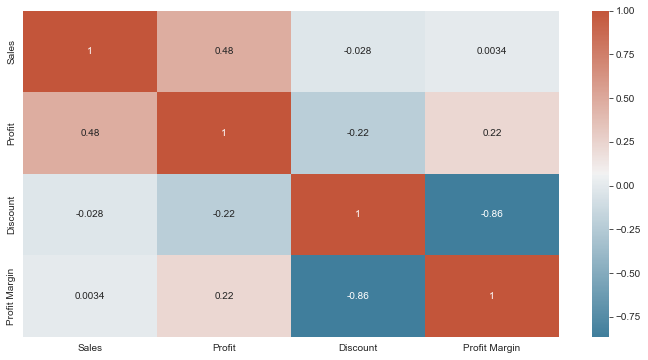

In [567]:
#Correlation between different variables
corr = df[['Sales', 'Profit', 'Discount', 'Profit Margin']].corr()

f, ax = plt.subplots(figsize=(12,6))
#Configure custom diverging colormap
cmap = sns.diverging_palette(230,20, as_cmap=True)
#Draw map
sns.heatmap(corr, annot=True, cmap=cmap)

* The correlation heatmap suggests that there is a highly negative correlation between discount and profit margin. As the one increases, the other decrease. The correlation is too high to ignore. Further exploration into the phenomena is needed.

<Figure size 1080x432 with 0 Axes>

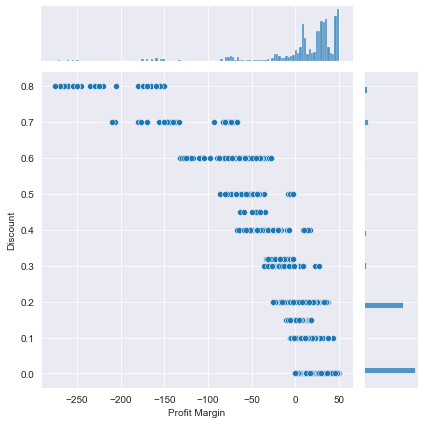

In [577]:
plt.figure(figsize=(15,6))

sns.jointplot(data=df, y='Discount', x='Profit Margin')

* The graph indicates that the Profit Margin decreseas as the Dicscount rate increases
* The Discount histogram shows that the most frequent Discount rates are 0.0% and 20%.  
* The Profit Margin histogram shows that majority of the products yield positive Profit Margins as the graph is skewed between 0-50% 

Text(0.5, 1.0, 'Profit by Year')

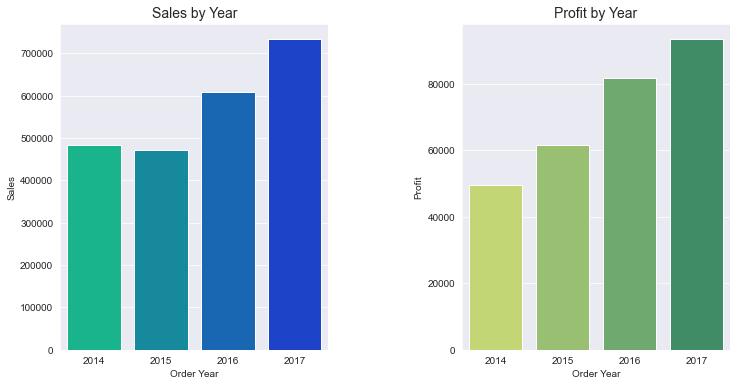

In [612]:
sales_by_year = df.pivot_table('Sales', index='Order Year', aggfunc='sum').reset_index()
profit_by_year = df.pivot_table('Profit', index='Order Year', aggfunc='sum').reset_index()

plt.figure(figsize=(12,6)).subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
g1 = sns.barplot(data=sales_by_year, x='Order Year', y='Sales', ci=None, palette='winter_r')
g1.set_title('Sales by Year', fontsize=14)

plt.subplot(1,2,2)
g2 = sns.barplot(data=profit_by_year, x='Order Year', y='Profit', ci=None, palette='summer_r')
g2.set_title('Profit by Year', fontsize=14)

* Both Sales and Profit have shown an upward positive trend with annunal increase
* 2015 saw a slight dip in Sales from the previous year
* These are good signs for the company

(0.0, 1000.0)

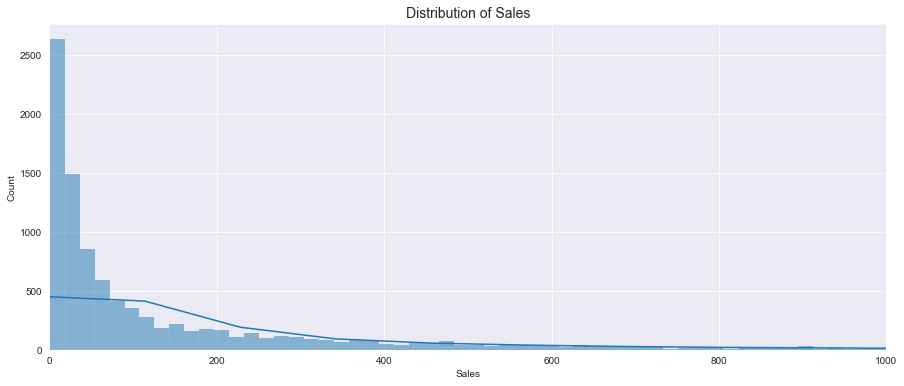

In [616]:
plt.figure(figsize=(15,6))
h = sns.histplot(data=df, x='Sales', kde=True)
h.set_title('Distribution of Sales', fontsize=14)
plt.xlim(0,1000)

* The frequency distribution graph shows that cheaper products are purchased more frequently than expensive products as the graph is skewed towards the right

(-500.0, 500.0)

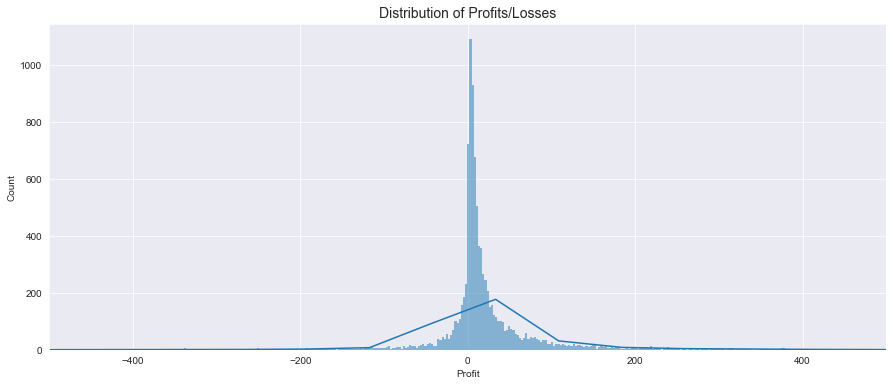

In [614]:
plt.figure(figsize=(15,6))
h = sns.histplot(data=df, x='Profit', kde=True)
h.set_title('Distribution of Profits/Losses', fontsize=14)
plt.xlim(-500,500)

* The frequency distribution graph is skewed towards the left which is good because it means the business is generating more Profit than losses from its Sales

## Analysis by Category:

In [15]:
#Get the median profit for each discount rate for each category
profit_pivot = df.pivot_table(['Profit'], index='Discount', columns='Category', aggfunc={'Profit':'sum', })
profit_pivot

Profit                             
Category   Furniture Office Supplies   Technology
Discount                                         
0.00      58133.0764     130506.1064  132348.4204
0.10       7111.0119       1086.0808     832.0843
0.15       1418.9915             NaN          NaN
0.20       6265.9491      38038.7512   46032.6057
0.30     -10695.3169             NaN     326.0395
0.32      -2391.1377             NaN          NaN
0.40     -16187.3968             NaN   -6869.6536
0.45      -2493.1111             NaN          NaN
0.50     -12871.1990             NaN   -7635.2291
0.60      -5944.6552             NaN          NaN
0.70      -3894.9394     -16601.0984  -19579.3191
0.80             NaN     -30539.0392          NaN

**The table shows the total profit/loss per Category at diff
erent discount rates from 2014-2018:** 
* Office Supplies suffers the highest loss across all three Categories when the discount is set to 70%
* Where there are values of NaN, it means that no discounts were offered at that rate for that Category

Text(0.5, 1.0, 'Technology')

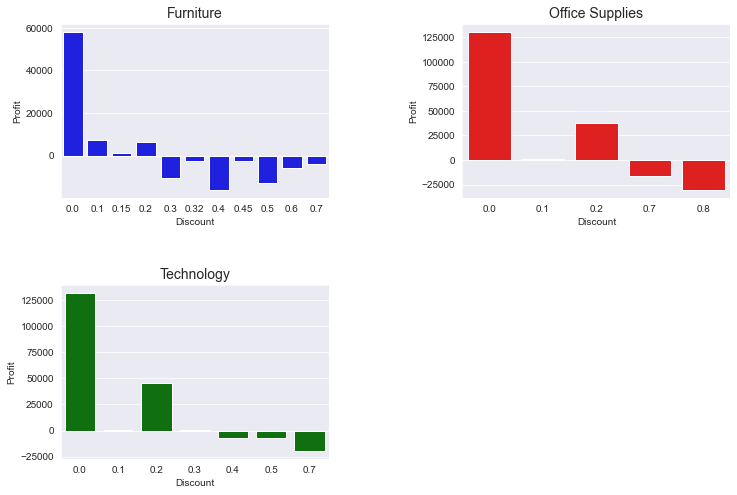

In [686]:
furn_filt = df['Category'] == 'Furniture'
furn_df = df.loc[furn_filt]

office_filt = df['Category'] == 'Office Supplies'
office_df = df.loc[office_filt]

tech_filt = df['Category'] == 'Technology'
tech_df = df.loc[tech_filt]

plt.figure(figsize=(12,8)).subplots_adjust(wspace=0.5, hspace=0.5)
plt.title('Profit/Losses Due To Discounts')

plt.subplot(2,2,1)
f = sns.barplot(data=furn_df, x='Discount', y='Profit', ci=None, color='blue', estimator=sum)
f.set_title('Furniture', fontsize=14)

plt.subplot(2,2,2)
o = sns.barplot(data=office_df, x='Discount', y='Profit', ci=None, color='red', estimator=sum)
o.set_title('Office Supplies', fontsize=14)

plt.subplot(2,2,3)
t = sns.barplot(data=tech_df, x='Discount', y='Profit', ci=None, color='green', estimator=sum)
t.set_title('Technology', fontsize=14)


**The bar graphs shows the total profit/loss per Category at different discount rates from 2014-2018:** 
* In general, discounts higher than 30% have a negative effect on profits for all three Categories
* The company should not offer discounts of more than 30% on any of its products to avoid losses

In [16]:
disc_pivot = df.pivot_table(['Sales'], index='Discount', columns='Category', aggfunc={'Sales':'sum', })
disc_pivot

Sales                            
Category    Furniture Office Supplies  Technology
Discount                                         
0.00      256025.2700      442150.000  389733.200
0.10       46634.2470        4324.149    3410.955
0.15       27558.5215             NaN         NaN
0.20      216631.0160      233049.736  314913.616
0.30       99470.3500             NaN    3756.305
0.32       14493.4588             NaN         NaN
0.40       45614.4060             NaN   70803.378
0.45        5484.9740             NaN         NaN
0.50       20983.4700             NaN   37935.070
0.60        6644.7000             NaN         NaN
0.70        2459.3820       22559.391   15601.509
0.80              NaN       16963.756         NaN

Text(0.5, 1.0, 'Sales vs Profit by Category')

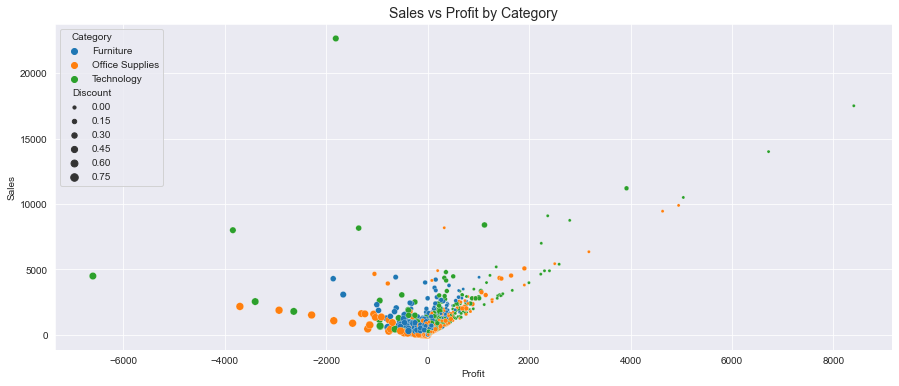

In [693]:
plt.figure(figsize=(15,6)) 
s_vs_p = sns.scatterplot(data=df, x='Profit', y='Sales', size='Discount', sizes=(10,60), hue='Category')
s_vs_p.set_title('Sales vs Profit by Category', fontsize=14)

* The higher the discount (bigger the circle), the more likely it is to lead to losses.
* The concentration and size of the blue dots to the left of 0 shows that Furniture has the highest contribution towards company losses

Text(0.5, 1.0, 'Total Profits per Category (2014 - 2017)')

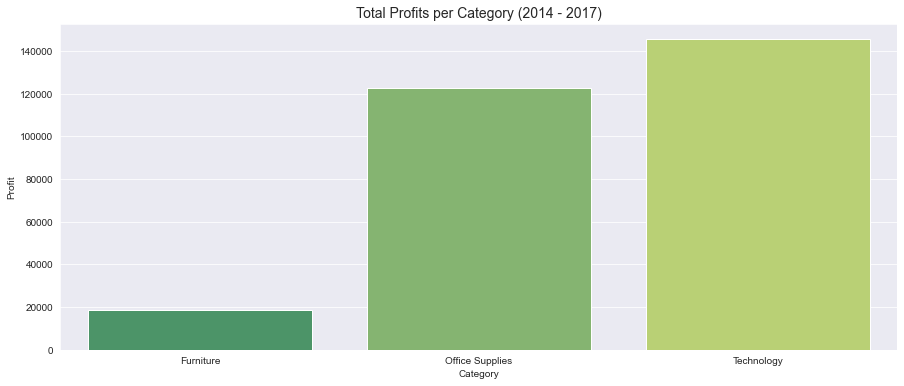

In [696]:
cat_pivot = df.pivot_table('Profit', index=['Category'], aggfunc='sum')
plt.figure(figsize=(15,6))        
cat_total = sns.barplot(data=cat_pivot.sort_values(by='Profit', ascending=True),x=cat_pivot.index, y='Profit', palette='summer');
cat_total.set_title('Total Profits per Category (2014 - 2017)', fontsize=14)
        

* Technology is the most profitable category, while Furniture is the least profitable category.

Text(0.5, 1.0, 'Annual Profits')

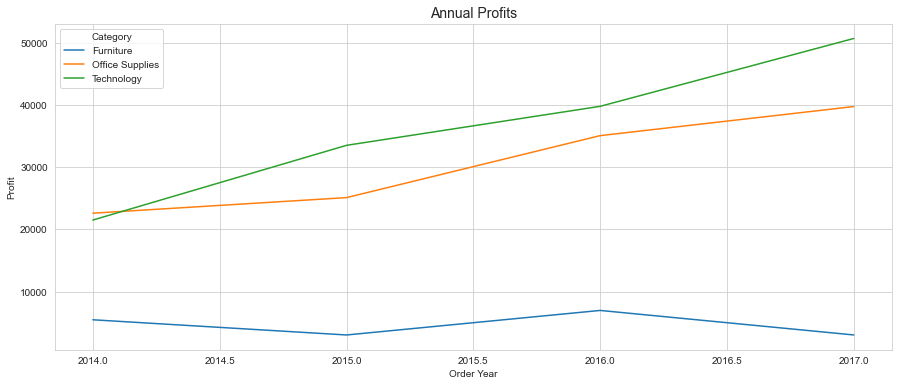

In [697]:
plt.figure(figsize=(15,6))
cat_yOy = df.groupby(['Order Year','Category'])['Profit'].agg('sum')
cat_yOy = cat_yOy.reset_index()

sns.set_style(style='whitegrid')
cat_yOy_line = sns.lineplot(data=cat_yOy, x=cat_yOy['Order Year'], y=cat_yOy['Profit'],hue=cat_yOy['Category'])
cat_yOy_line.set_title('Annual Profits', fontsize=14)

* Technology and Office Supplies have shown an increase in profits with each passing year.
* Furniture has seen drops in profits in 2015 & 2017 as compared to previous years, respectively.
* Technology and Office supplies have never yielded annual profits below \\$20,000 while Furniture has never yielded profits of more than \\$10,000

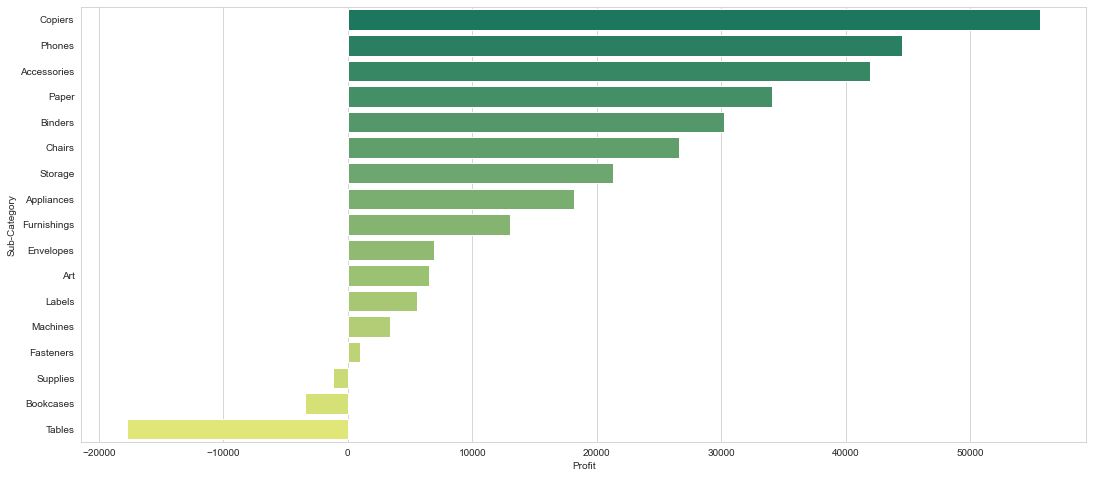

In [699]:
subcat_pivot = df.pivot_table('Profit', index=['Sub-Category'], aggfunc='sum')
subcat_pivot = subcat_pivot.reset_index()

sns.set_style(style='whitegrid')
plt.figure(figsize=(18,8)) 

sns.barplot(data=subcat_pivot.sort_values(by='Profit', ascending=False),y='Sub-Category', x='Profit', palette='summer');
        

* A deeper dive into the Sub-Categories shows that Tables, Supplies and Bookcases have not yielded any profits.
* Accessories have yielded the highest profits over the analysis period.

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

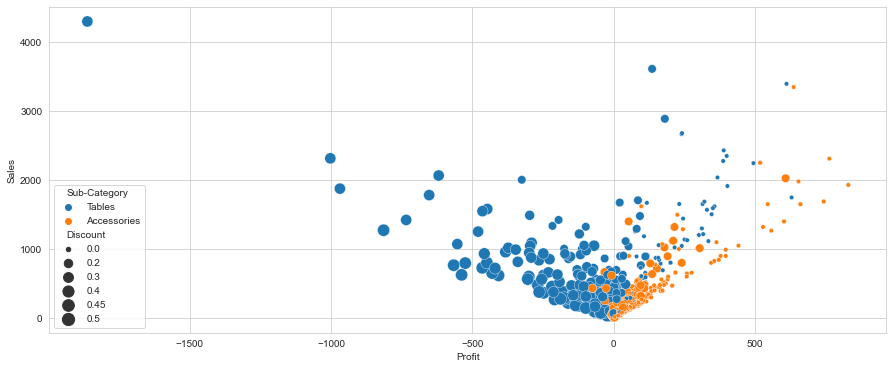

In [93]:
filt = df[(df['Sub-Category'] == 'Tables') | (df['Sub-Category'] == 'Accessories')]

subcat_df = filt[['Sub-Category', 'Discount', 'Profit', 'Sales']]

sns.set_style(style='whitegrid')
plt.figure(figsize=(15,6)) 
sns.scatterplot(data=subcat_df, x='Profit', y='Sales', size='Discount', sizes=(20,150), hue='Sub-Category')

**Comparing attributes of the product that brings in the greatest profit vs the product that brings in the greatest loss:** 
* Tables are sold at greater discount rates than Accessories
* Generally, when there is no discount offered, both products perform well
* Discounted products yield more losses for Tables than Accessories

## Analysis by Geography:

<AxesSubplot:ylabel='Sales'>

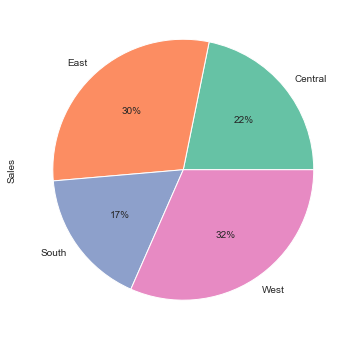

In [135]:
#Get the market share for each region:
mshare_grp = df.groupby(['Region'])['Sales'].agg('sum')

plt.figure(figsize=(15,6)) 
colors = sns.color_palette('Set2')
mshare_grp.plot(kind='pie', colors=colors, autopct='%.0f%%')

The West has contributed the highest total sales over the analysis period closely followed by the East.   
Meanwhile, the South contributes the lowest total sales.

<AxesSubplot:xlabel='Region', ylabel='Profit'>

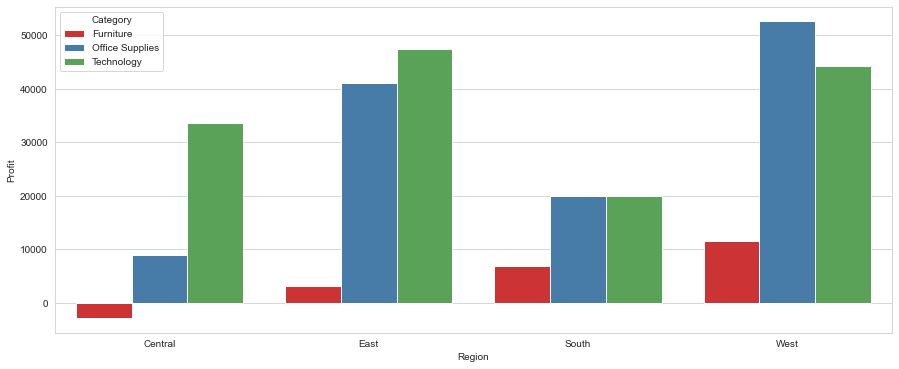

In [86]:
#Get the total profit for each category in each region:
region_grp1 = df.groupby(['Region', 'Category'])['Profit'].agg('sum')
region_grp1 = region_grp1.reset_index()

sns.set_style(style='whitegrid')
plt.figure(figsize=(15,6)) 

sns.barplot(data=region_grp1, x='Region', y='Profit', hue='Category', palette='Set1')

**The most profitable Category in each Region:**  
* Technology highest contibutor to profits in two Regions: Central and East
* Furniture is the lowest contributors to profits in every Region, with the Central region running at a loss

<AxesSubplot:xlabel='Region', ylabel='Sales'>

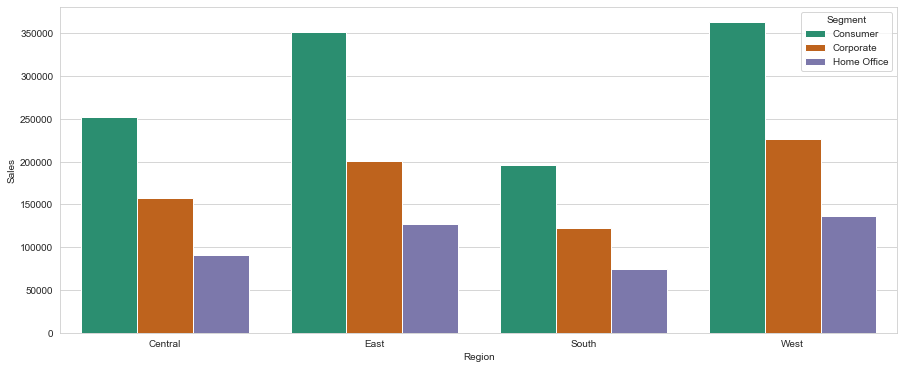

In [90]:
seg_grp = df.groupby(['Region', 'Segment'])['Sales'].agg('sum')
seg_grp = seg_grp.reset_index()

sns.set_style(style='whitegrid')
plt.figure(figsize=(15,6)) 

sns.barplot(data=seg_grp, x='Region', y='Sales', hue='Segment', palette='Dark2')

The common trend for each Region sees Consumers Segment contributing the most to total Sales per Region while Home Office contributes the least

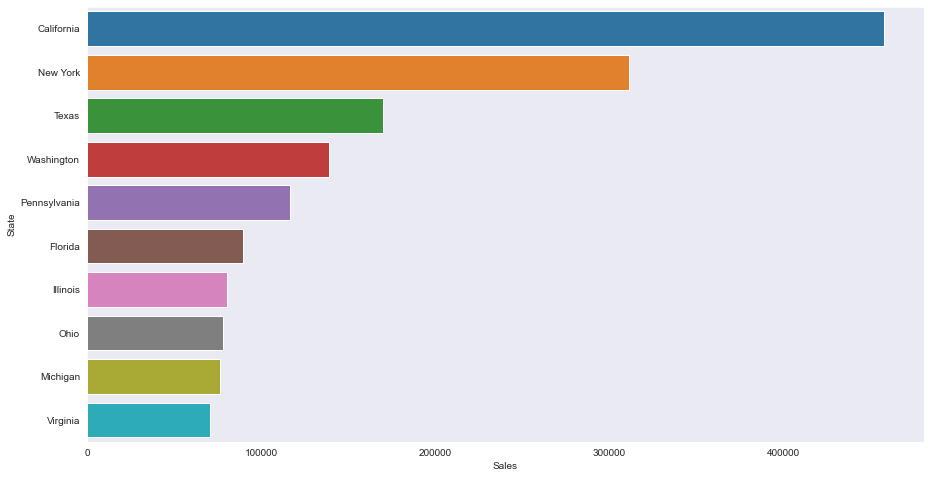

In [151]:
state_pivot = df.pivot_table('Sales', index=['State'], aggfunc='sum')
reset_state_pivot = state_pivot.reset_index()
sorted_state_pivot = reset_state_pivot.sort_values(by='Sales', ascending=False)
top_state_pivot = sorted_state_pivot.head(10)

sns.set_style(style='dark')
sns.color_palette('Reds', as_cmap=False)
plt.figure(figsize=(15,8)) 

sns.barplot(data=top_state_pivot, y='State', x='Sales');


The Top 3 States that contibute the most to total Sales are California, New York and Texas.

Text(0.5, 1.0, 'Annual Sales per Region')

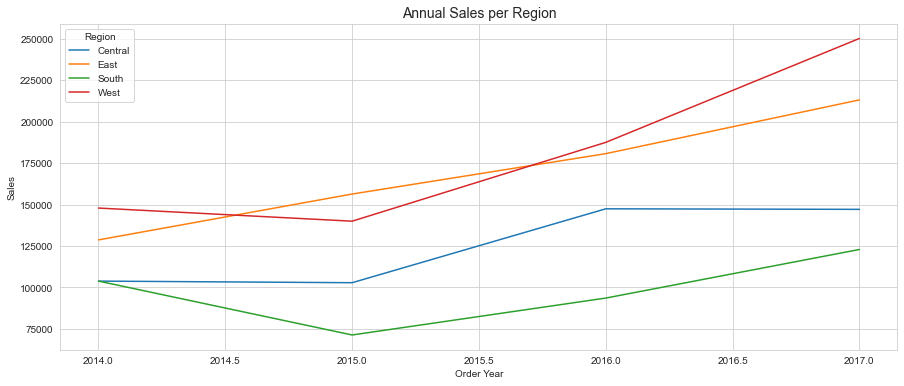

In [700]:
plt.figure(figsize=(15,6))
cat_yOy = df.groupby(['Order Year','Region'])['Sales'].agg('sum')
cat_yOy = cat_yOy.reset_index()
reg_line = sns.lineplot(data=cat_yOy, x=cat_yOy['Order Year'], y=cat_yOy['Sales'],hue=cat_yOy['Region'])
reg_line.set_title('Annual Sales per Region', fontsize=14)


* The Central region has not increased in Sales between 2016-2017
* Despite being the lowest, the South has improvedsteadily since 2015 and looks to passs the Central region in Sales soon
* The West's annual Sales have been increasing at a faster rate than  all the other Regions 

## Analysis by Customers:

In [347]:
cust_sales = df.pivot_table('Sales', index='Customer Name', aggfunc='sum')
sorted_cust_sales =cust_sales.sort_values(by='Sales', ascending=False)
sorted_cust_sales

sorted_cust_sales["cumpct"] = sorted_cust_sales["Sales"].cumsum() / sorted_cust_sales["Sales"].sum()*100
sorted_cust_sales.describe()

,Sales,cumpct
count,793.000000,793.000000
mean,2896.848500,72.128498
std,2628.670117,26.074597
min,4.833000,1.090155
25%,1146.050000,55.130168
50%,2256.394000,80.155658
75%,3785.276000,94.545985
max,25043.050000,100.000000


* The summary indicates that 25% of the customer base contributed to 55% of the revenue 

In [369]:
quantiles=[0.05,0.1,0.15,0.2]
sorted_cust_sales.quantile(q=quantiles)

,Sales,cumpct
0.05,277.1024,19.225508
0.10,583.0384,30.930740
0.15,790.7176,40.302144
0.20,961.5406,48.222914


**Further exploration into quantiles shows that:**
* 5% of the customer base contributes to 20% of the revenue which is a very big proportion

In [461]:
cust_prof = df.pivot_table('Profit', index='Customer Name', aggfunc='sum')
sorted_cust_prof =cust_prof.sort_values(by='Profit', ascending=False)
sorted_cust_prof

sorted_cust_prof["cumpct"] = sorted_cust_prof["Profit"].cumsum() / sorted_cust_prof["Profit"].sum()*100
sorted_cust_prof.describe()

,Profit,cumpct
count,793.000000,793.000000
mean,361.156396,101.858273
std,894.261812,27.725255
min,-6626.389500,3.135970
25%,36.613100,90.223099
50%,227.833800,113.822142
75%,560.007800,122.589387
max,8981.323900,124.869139


* The summary indicates that 25% of the customer base is responsible for 90% of the profits. These customers are very important

In [502]:
quantiles=[0.05,0.1,0.15,0.2]
sorted_cust_prof.quantile(q=quantiles)

,Profit,cumpct
0.05,-387.43218,39.366796
0.10,-187.59666,57.775214
0.15,-55.55268,71.381083
0.20,1.02332,81.760163


* The summary indicates that 5% of the customer base is responsible for 40% of the profits. 

In [506]:
top_cust = sorted_cust_sales.loc[sorted_cust_sales['cumpct'] <= 20]

top_cust = top_cust.reset_index()

top_cust["cumpct"] = top_cust["Sales"].cumsum() / top_cust["Sales"].sum()*100
top_cust_df = df.loc[df['Customer Name'].isin(top_cust['Customer Name'])]
top_cust_df.describe(include=[object])

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,806,806,806,806,806,806,806,806,806,806,806,806,806
unique,338,4,42,42,3,1,129,43,4,649,3,17,640
top,CA-2017-100111,Standard Class,JL-15835,John Lee,Consumer,United States,New York City,California,West,OFF-BI-10001359,Office Supplies,Binders,Easy-staple paper
freq,14,533,34,34,470,806,103,135,235,5,450,114,7


In [492]:
bot_cust = sorted_cust_sales.loc[sorted_cust_sales['cumpct'] >= 75]

bot_cust = bot_cust.reset_index()

bot_cust["cumpct"] = bot_cust["Sales"].cumsum() / bot_cust["Sales"].sum()*100
bot_cust_df = df.loc[df['Customer Name'].isin(bot_cust['Customer Name'])]
bot_cust_df.describe(include=[object])

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,4295,4295,4295,4295,4295,4295,4295,4295,4295,4295,4295,4295,4295
unique,2346,4,446,446,3,1,414,47,4,1617,3,17,1601
top,CA-2017-157987,Standard Class,XP-21865,Xylona Preis,Consumer,United States,New York City,California,West,FUR-FU-10004270,Office Supplies,Binders,Staples
freq,12,2529,28,28,2266,4295,420,865,1335,11,2725,705,26


<AxesSubplot:xlabel='Category', ylabel='Sales'>

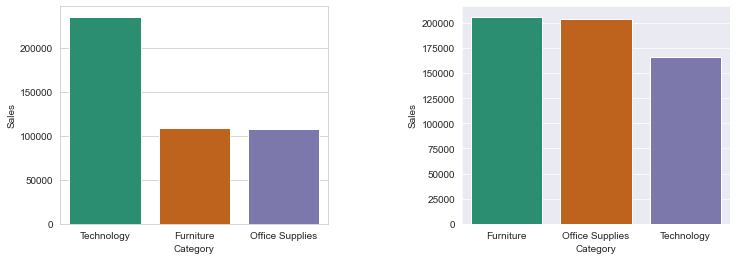

In [705]:
top_cust_cat = top_cust_df.pivot_table('Sales', index='Category', aggfunc='sum')
top_cust_cat = top_cust_cat.sort_values(by='Sales', ascending=False).reset_index()



plt.figure(figsize=(12,4)).subplots_adjust(wspace=0.5)

sns.set_style(style='whitegrid')
plt.subplot(1,2,1)

sns.barplot(data=top_cust_cat, x='Category', y='Sales', palette='Dark2')

bot_cust_cat = bot_cust_df.pivot_table('Sales', index='Category', aggfunc='sum')
bot_cust_cat = bot_cust_cat.sort_values(by='Sales', ascending=False).reset_index()

sns.set_style(style='darkgrid')
plt.subplot(1,2,2)

sns.barplot(data=bot_cust_cat, x='Category', y='Sales', palette='Dark2')

Text(0.5, 1.0, 'Spending Habits of Bottom 5% of Customers')

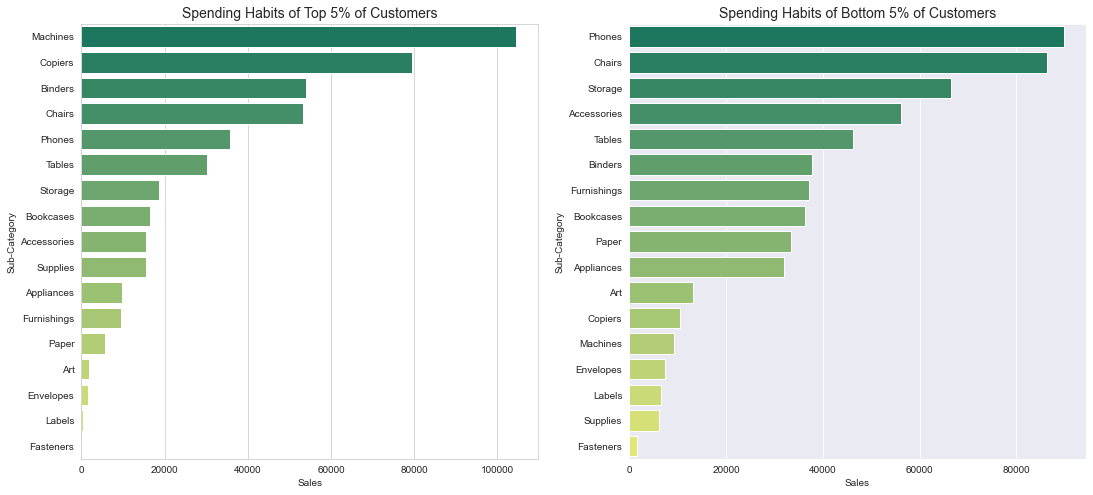

In [706]:
top_cust_subcat = top_cust_df.pivot_table('Sales', index='Sub-Category', aggfunc='sum')
top_cust_subcat = top_cust_subcat.sort_values(by='Sales', ascending=False).reset_index()

plt.subplots(figsize=(18,8))

sns.set_style(style='whitegrid')
plt.subplot(1,2,1)

top = sns.barplot(data=top_cust_subcat, x='Sales', y='Sub-Category',  palette='summer')
top.set_title('Spending Habits of Top 5% of Customers', fontsize=14)

###

bot_cust_subcat = bot_cust_df.pivot_table('Sales', index='Sub-Category', aggfunc='sum')
bot_cust_subcat = bot_cust_subcat.sort_values(by='Sales', ascending=False).reset_index()


sns.set_style(style='darkgrid')
plt.subplot(1,2,2)

bot = sns.barplot(data=bot_cust_subcat, y='Sub-Category', x='Sales', palette='summer')
bot.set_title('Spending Habits of Bottom 5% of Customers', fontsize=14)



## Recommendations
* To mitigate losses, discounts should not exceed 20% on all products
* Products with low profit margins should be bundled with high profit margin products
* Marketing efforts should be focused in the States and Cities of the Top 25% of customers as there is more likely to be a bigger pool of potential buyers